<img src =  "Google.png" width = 500>

I am very curious to know about Google, what are the Requirements, Educational and other Requirements, Locations available to work with Google and most important the Job Roles in Google. Using the acquired dataset, I am going to be making us of mostly **Words Cloud** as the major form of visualisation to present findings gotten from the dataset. Hope you enjoy.

The dataset I used is a Google job selection dataset (hence the name Google job analysis) which contains location, minimum qualification, etc. It contains categorical data (nominal data to be precise) which enable me to perform word cloud visualisations on them.
The research questions are:
1.	 What are the most prominent locations where Google job opportunities are available?
2.	What are the minimum qualifications that are needed for you to be able to get a job at Google?
3.	Finally, what are the preferred qualifications you can have that would increase your chances of getting their jobs.


## Reading and Cleaning Data

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

The dataset to be analysed is imported and 5 rows are displayed for us to see a snippet of the dataset

In [2]:
job_skill = pd.read_csv("job_skills.csv")
job_skill.head(5)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


This is the list of column headers 

In [3]:
job_skill.columns.values 

array(['Company', 'Title', 'Category', 'Location', 'Responsibilities',
       'Minimum Qualifications', 'Preferred Qualifications'], dtype=object)

In [4]:
job_skill.shape

(1250, 7)

There are 1250 **rows** and 7 **columns**

The data types are shown below as well.

In [5]:
job_skill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   1250 non-null   object
 1   Title                     1250 non-null   object
 2   Category                  1250 non-null   object
 3   Location                  1250 non-null   object
 4   Responsibilities          1235 non-null   object
 5   Minimum Qualifications    1236 non-null   object
 6   Preferred Qualifications  1236 non-null   object
dtypes: object(7)
memory usage: 68.5+ KB


We can see, along with the column headers, the data types that is attached to each of the columns. The data is catergorical (**nominal**) so the use of word cloud for visualisation is appropriate

In [6]:
# description of dataset
job_skill.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1250,1250,1250,1250,1235,1236,1236
unique,2,794,23,92,801,807,821
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Currently enrolled in a Bachelor's or Master's...,Interest in the technology industry and Google...
freq,1227,35,168,190,33,32,32


Check to see if there are any missing values

In [7]:
job_skill.isnull().any()

Company                     False
Title                       False
Category                    False
Location                    False
Responsibilities             True
Minimum Qualifications       True
Preferred Qualifications     True
dtype: bool

In [8]:
job_skill = job_skill.dropna(how='any',axis='rows')

All null/empty rows are dropped as seen below.

In [9]:
job_skill.isnull().any()

Company                     False
Title                       False
Category                    False
Location                    False
Responsibilities            False
Minimum Qualifications      False
Preferred Qualifications    False
dtype: bool

In [10]:
job_skill["Company"].value_counts()

Google     1212
YouTube      23
Name: Company, dtype: int64

Oh no, youtube was also included in the Company column of the dataset. However, we are interested in Google not youtube, so therefore we have the drop it.

In [11]:
# So I drop Youtube
job_skill = job_skill[job_skill.Company != 'YouTube']
print("Done")

Done


In [12]:
job_skill.shape

(1212, 7)

The number of rows has dropped from 1250 to 1212 rows as null and unwanted rows of data has been removed. However, we still have 7 columns. This concludes our data cleaning process

-----------
## Word cloud Visualisation

We would use word clouds to draw certain insights for the dataset. Let us have a look at the dataset again

In [13]:
job_skill.head(5)

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


Word clouds are commonly used to perform high-level analysis and visualization of text data

Looking at the location column, we can use word cloud to see the most prominent locations where Google are offering job opportunities.

In [14]:
# to install word cloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/linux-64::wordcloud-1.4.1-py36_0

The following packages will be U

In [15]:
stopwords = set(STOPWORDS)

In [16]:
from PIL import Image
location_mask = np.array(Image.open('comment mask.png'))

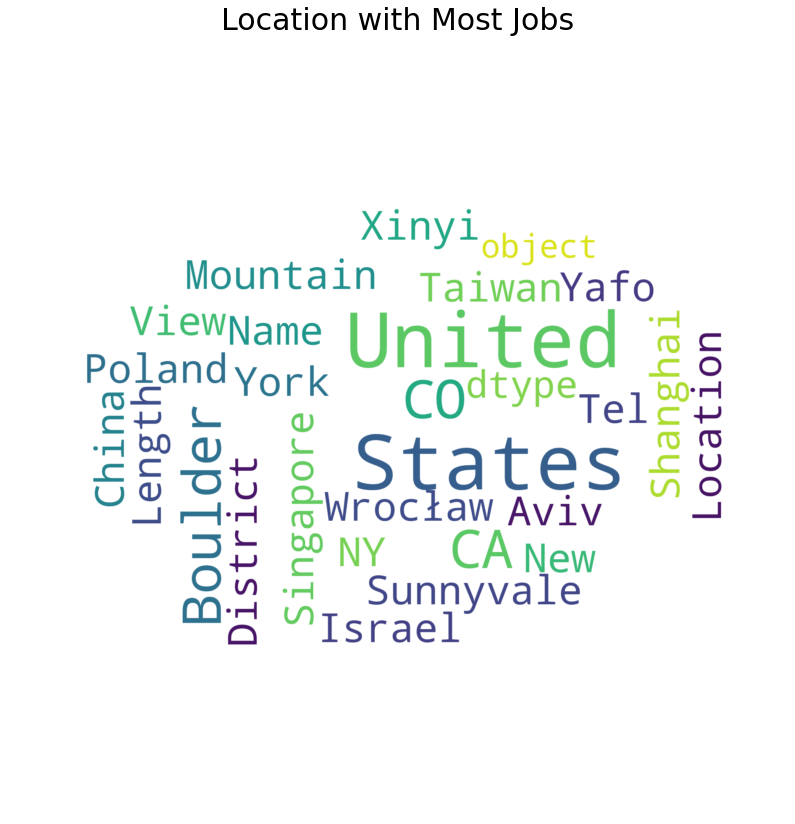

In [17]:
location_wc2 = WordCloud(background_color='white', mask=location_mask, stopwords=stopwords,
               )
location_wc2.generate(str(job_skill['Location']))

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(location_wc2, interpolation='bilinear')
plt.title('Location with Most Jobs', fontsize = 30)
plt.axis('off')
plt.show()

After looking at the above cloud of words which shows the most available locations for jobs in Google, we can conclude that some of the most available locations include China,Singapore,United States,Poland, Israel and Cities of US include Mountain View, New York, Sunnyvale etc.

In [18]:
min_qualification_wc = WordCloud(
    background_color='white'
    ,max_words = 100 ,stopwords=stopwords).generate(str(job_skill['Minimum Qualifications']))

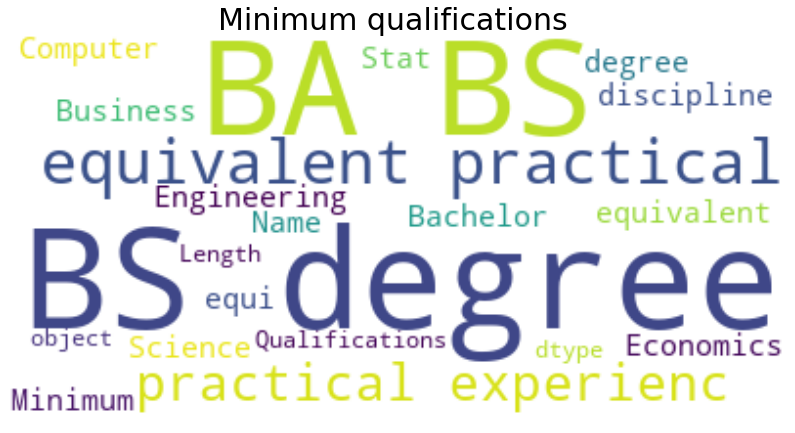

In [19]:
#display word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.title('Minimum qualifications ', fontsize = 30)
plt.imshow(min_qualification_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

After looking at the above cloud of words which states the most demanded Educational Requirements, We can Conclude that Some of the most Important Educational Requirements Include Technical Experience, BA, BS, Computer Science, and Practical Experience etc

In [20]:
cloud_mask = np.array(Image.open('cloud mask.png'))

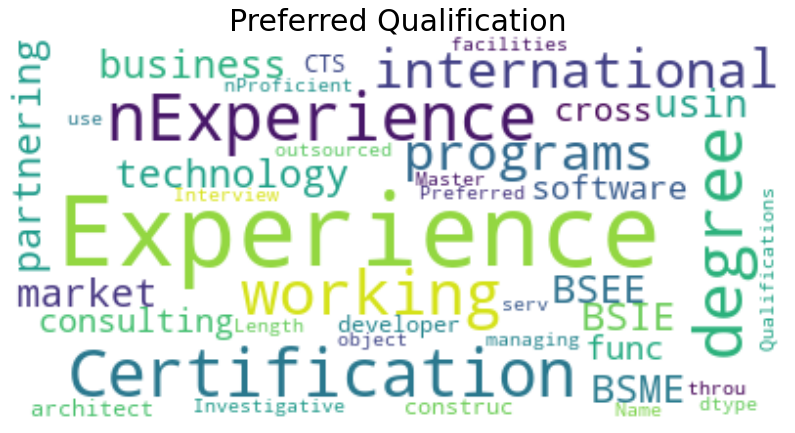

In [21]:
Preferred_Qualifications_wc2 = WordCloud(background_color='white', stopwords=stopwords,
               )
Preferred_Qualifications_wc2.generate(str(job_skill['Preferred Qualifications']))

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(Preferred_Qualifications_wc2, interpolation='bilinear')
plt.title('Preferred Qualification', fontsize = 30)
plt.axis('off')
plt.show()

After looking at the above cloud of words which states the most demanded Preferred Additional Requirements, We can Conclude that Some of the most Important Preferred Requirements Include Technical Experience, Certifications, Master Degree, Computer Science, etc.